# CryptoBot en Telegram con Python

#### Creación de un Bot de Telegram con Python para mostrar los precios de varias criptomonedas.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/jaisenbe58r/iAApi-QAS-BERT/blob/main/SQUAD_es_GPU.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/jaisenbe58r/ProductionTF2serving/blob/main/PipelineClasificationImages.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>



**Referencias:**

- [Cómo crear tu propio bot de Telegram con Python](https://platzi.com/blog/bot-python/)
- [python-telegram-bot](https://github.com/python-telegram-bot/python-telegram-bot)
- [Documentación FastApi](https://fastapi.tiangolo.com/deployment/docker/)
- [WebAnalysis Crypto](https://awebanalysis.com/es/coin-details/bitcoin/)


**Autor**:
- [Jaime Sendra Berenguer](https://www.jaimesendraberenguer.com/)

<table class="tfo-notebook-buttons" align="left">

  <td>
    <a target="_blank" href="https://www.linkedin.com/in/jaisenbe/"><img src="https://static.wixstatic.com/media/5ee9eb_93f03193bd484ab9b0c172894922677d~mv2.png/v1/fill/w_42,h_42,al_c,q_85,usm_0.66_1.00_0.01/5ee9eb_93f03193bd484ab9b0c172894922677d~mv2.webp" />Linkedin</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/jaisenbe58r"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />GitHub</a>
  </td>
  <td>
    <a target="_blank" href="https://medium.com/@jaimesendraberenguer"><img src="https://static.wixstatic.com/media/5ee9eb_8325cf93e20047b7ae2b18c369fd0448~mv2.png/v1/fill/w_42,h_42,al_c,q_85,usm_0.66_1.00_0.01/5ee9eb_8325cf93e20047b7ae2b18c369fd0448~mv2.webp" />Medium Blog</a>
  </td>
  <td>
    <a target="_blank" href="https://www.kaggle.com/jaisenbe58r"><img src="https://static.wixstatic.com/media/5ee9eb_0a6d700146bb4712af78dcaa8f5a3b87~mv2.png/v1/fill/w_42,h_42,al_c,q_85,usm_0.66_1.00_0.01/5ee9eb_0a6d700146bb4712af78dcaa8f5a3b87~mv2.webp" />Kaggle</a>
  </td>
</table>

## Introducción

En este post nos iniciamos en la integración de un Bot de Telegram desarrollado con Python. Este Bot le hemos denominado `CryptoBot` y será capaz de mostrarnos el valor de varias criptomonedas en tiempo real según nuestra selección.

Necesitaremos tener descargado [Telegram](https://telegram.org/), ya sea la app para smartphone o la versión escritorio para PC.

## Crear el bot desde Telegram

En primer lugar vamos a necesitar dar de alta nuestro bot desde Telegram por medio de [@BotFather](https://t.me/BotFather). Para ello escribimos *@BotFather* en el buscador de Telegram:

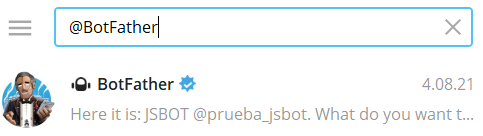

Para crear un nuevo Bot con @BotFather, primero que todo lanzamos el comando `/start` y nos mostrará toda la lista de comandos permitidos:

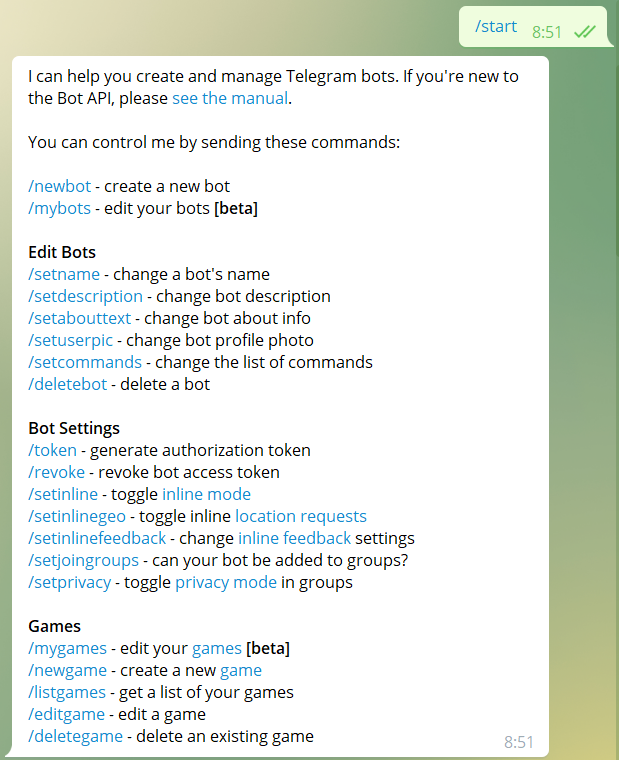

Para crear el bot ejecutamos `/newbot`, seguidamente asignamos el nombre del bot y el nombre de usuario. 

- nombre: **JSBOT**
- usuario: **prueba_jsbot** (importante que termine en `bot`)

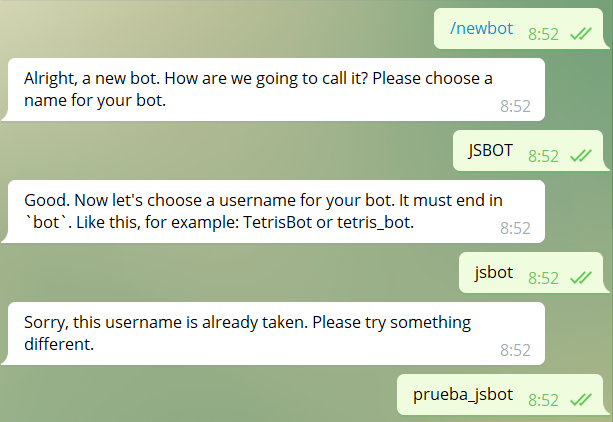

Una vez el Bot esté creado, nos aparecerá un mensaje con el `TOKEN`de acceso (**no compartas el código!**) y la `URL`de acceso:

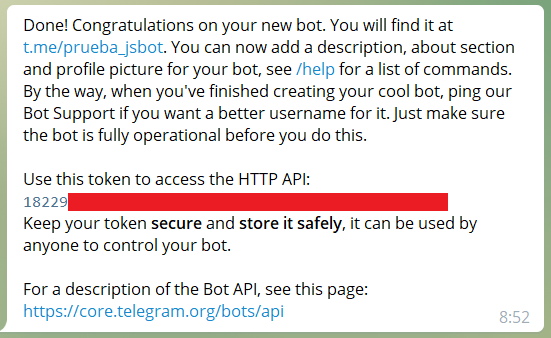

In [15]:
TOKEN = "1822940565:AAE0LgfWU7Og8bDu1EJRccF9rpFCRlVLvMc" # @param {type: "string"}
CHAT_ID = "1115311095" # @param {type: "string"}

## Primer mensaje 

Importamos el módulo `request`para lanzar una petición HTTPs a la API de Telegram Bot:

In [16]:
import requests

La petición debe tener la siguiente estructura: 

`https`://api.telegram.org/bot`<TOKEN>`/`METHOD_NAME`

Si quieres consultar todos los métodos, acá te dejo la [documentación](https://core.telegram.org/bots/api#making-requests).

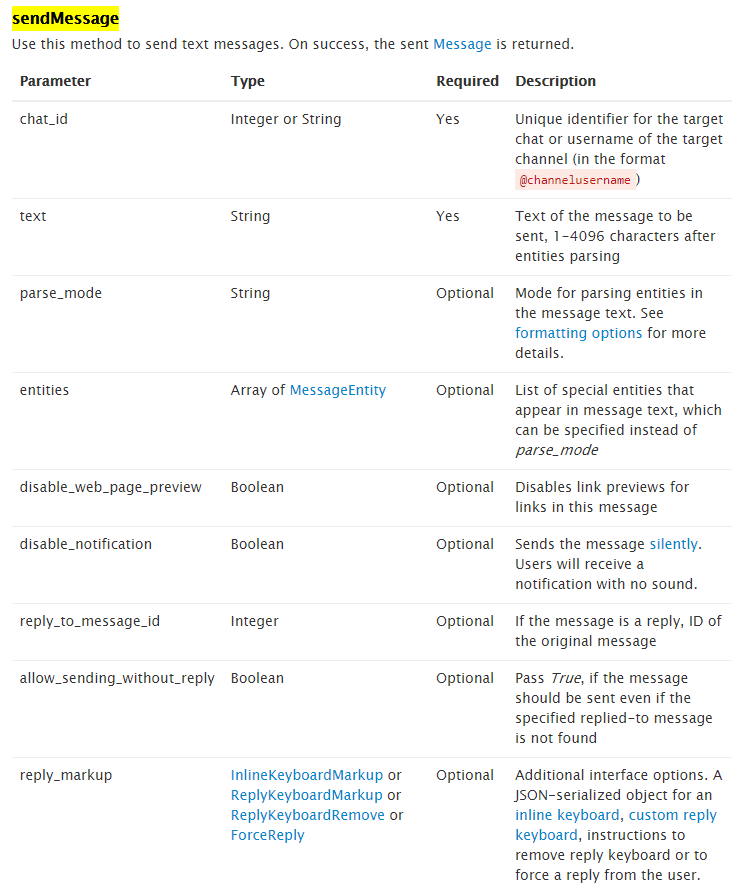

In [17]:
def bot_send_text(bot_message):
    
    bot_token = TOKEN
    bot_chatID = CHAT_ID
    send_text = 'https://api.telegram.org/bot' + bot_token + '/sendMessage?chat_id=' + bot_chatID + '&parse_mode=Markdown&text=' + bot_message

    response = requests.get(send_text)

    return response


Para enviar el mensaje, llamamos a `bot_send_text`con el texto a enviar como argumento:

In [18]:
test_bot = bot_send_text('¡Estamos en Telegram!')

Inmediatamente recibiremos un mensaje de nuestro bot:

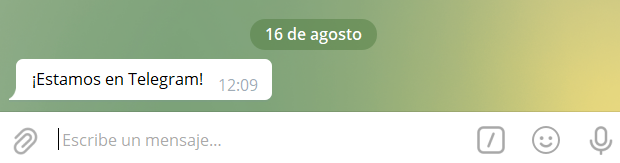

## Web scraping de las criptomonedas

En primer lugar, instalamos e importamos las librerias que nos permitirán obtener el precio en tiempo real de las criptomonedas preconfiguradas.

In [19]:
# Para hacer webscraping de las criptomonedas
!pip install bs4


In [20]:
from bs4 import BeautifulSoup  #del módulo bs4, necesitamos BeautifulSoup

El procedimiento de web scraping se basa en conectarnos a una página web que actualice el valor de las criptomonedas en tiempo real. En nuestro caso hemos optado por la siguiente página [web](https://awebanalysis.com/es/coin-details/bitcoin/):

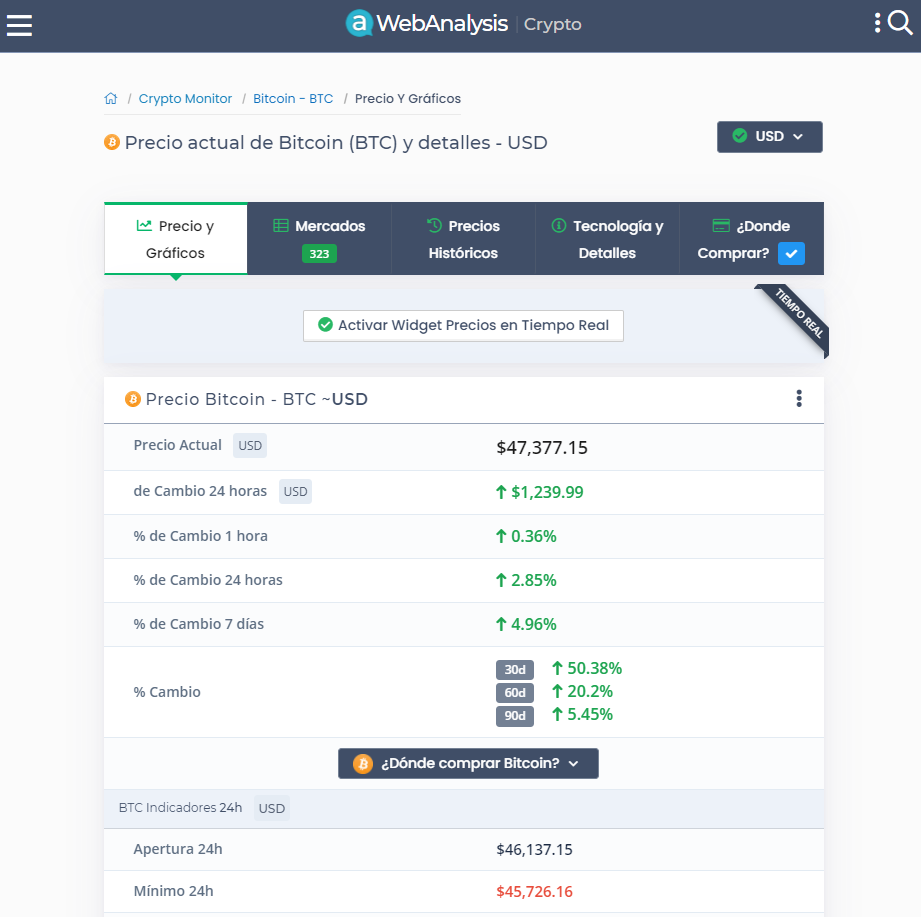

Nuestro objetivo va a ser obtener el valor de las siguientes criptomonedas:
- Bitcoin
- Ethereum
- Tether
- Cardano
- Maker
- Ripple
- DogeCoin

In [21]:
CRIPO_MONEDAS = ["Bitcoin", "Ethereum", "Tether", "Cardano", "Maker", "Ripple", "DogeCoin"]

Para poder `parsear` el valor real de la criptomoneda necesitamos acceder al inspector de nuestro navegador y obtener la etiqueta `HTML`a la que hace referencia y el nombre de la clase:

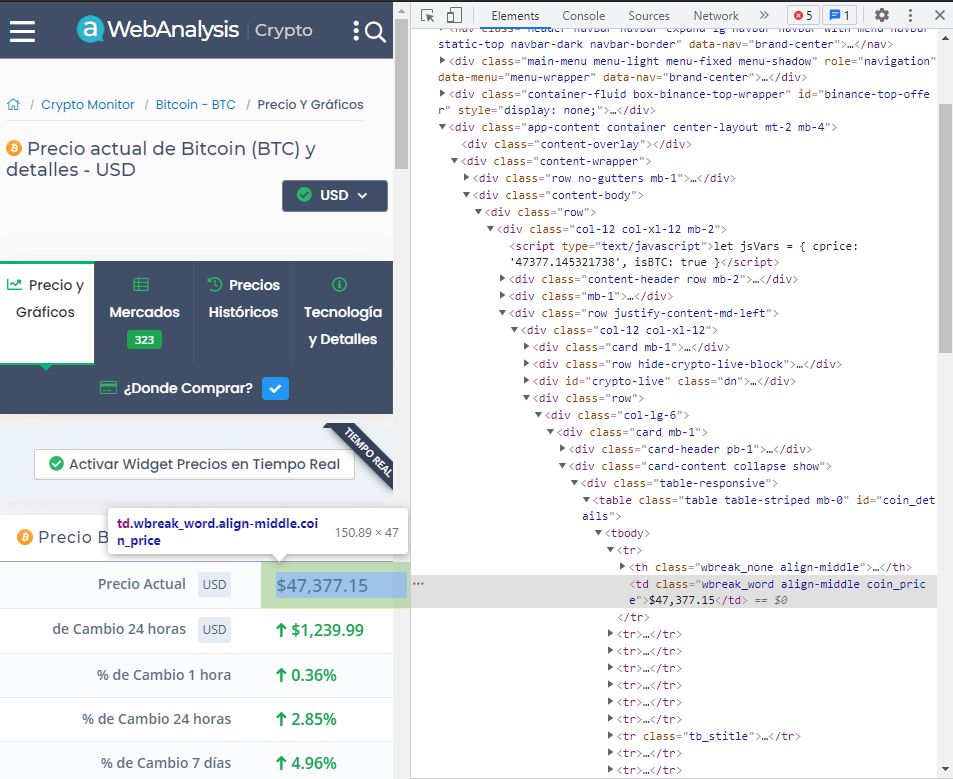

Vemos como la etiqueta `HTML` es `td` y la clase es `'wbreak_word align-middle coin_price`.

Observamos también que en la `URL` de la página web podemos acceder a la criptomoneda seleccionada de la siguiente manera:

`https:`//awebanalysis.com/es/coin-details/`<CRIPTO>`/

image.png

Se prepara la función `btc_scraping` para obtener el valor en tiempo real de la criptomoneda seleccionada. Para ello se introduce como argumento el nombre de la criptomoneda (perteneciente a la lista anterior) para construir la `URL`de acceso a la página correspondiente

Del módulo `soup`, traemos la función `find`, en la cual el primer parámetro es la etiqueta HTML del elemento que contiene el precio de Bitcoin y el segundo parámetro es un diccionario, cuya llave es `class` y el valor es la clase que obtuviste.

Al guardar lo anterior en la variable `result`, te devolverá también la etiqueta `HTML` y su clase. Para que te quede solo el valor, aplica el método `text` a la variable `result` y se guarda en una nueva variable para que la función retorne ese resultado.

In [22]:
def btc_scraping(cripto):
    url = requests.get(f'https://awebanalysis.com/es/coin-details/{cripto}/')
    soup = BeautifulSoup(url.content, 'html.parser')
    result = soup.find('td', {'class': 'wbreak_word align-middle coin_price'})
    format_result = result.text

    return format_result


Se prepara también la función `report`, que nos servirá para formatear el texto que mostrará el bot directamente en `Telegram`.

In [23]:
def report(cripto):
    btc_price = f'El precio de {cripto} es de {btc_scraping(cripto)}'
    bot_send_text(btc_price)

Como ejemplo, probemos con el valor del "Bitcoin" utilizando la función `report`, y vemos como realmente se envía el mensaje y corresponde con el valor del "Bitcoin" en ese instante:

In [24]:
report(CRIPO_MONEDAS[0])  # CRIPO_MONEDAS[0] = "Bitcoin"

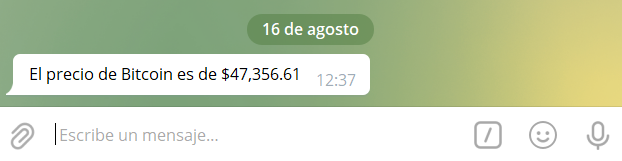

## CryptoBot

A continuación, vamos a crear el `CryptoBot`de manera que se comporte de forma interactiva para poder seleccionar la criptomoneda a partir de un listado en forma de botones.

Antes de nada, instalamos e importamos todas las librerías necesarias para crear este bot interactivo. Vamos a utilizar [python-telegram-bot](https://github.com/python-telegram-bot/python-telegram-bot), interfaz en python para facilitar la integración de [Telegram Bot API](https://core.telegram.org/bots/api).

In [25]:
!pip install python-telegram-bot --upgrade

In [26]:
import logging
from typing import List, Tuple, cast

from telegram import InlineKeyboardButton, InlineKeyboardMarkup, Update
from telegram.ext import (
    Updater,
    CommandHandler,
    CallbackQueryHandler,
    CallbackContext,
    InvalidCallbackData,
    PicklePersistence,
)

logging.basicConfig(
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s', level=logging.INFO
)
logger = logging.getLogger(__name__)

Seguidamente, pasamos a la implementación del `CryptoBot` interactivo utilizando la libreria `python-telegram-bot`.

Para ello utilizamos como handlers:
- `/start`: Forzar el inicio del `CryptoBot`.
- `/help`: Método para mostrar la ayuda e instrucciones para iniciar el `CryptoBot`.
- `/stop`: Forzar el paro del `CryptoBot`.

El listado de botones para la selección de cada criptomoneda se ejecuta desde el método `list_button`, donde se renderiza cada uno de los botones a partir del método `build_keyboard` y se muestra en la parte superior el valor de la criptomoneda seleccionada.

In [27]:

def start(update: Update, context: CallbackContext) -> None:
    """Sends a message with 5 inline buttons attached."""
    number_list: List[int] = []
    update.message.reply_text('Please choose:', reply_markup=build_keyboard(number_list))


def help_command(update: Update, context: CallbackContext) -> None:
    """Displays info on how to use the bot."""
    update.message.reply_text(
        "Use /start to test this bot."
    )


def build_keyboard(current_list: List[str]) -> InlineKeyboardMarkup:
    """Helper function to build the next inline keyboard."""
    return InlineKeyboardMarkup.from_column(
        [InlineKeyboardButton(str(i), callback_data=(i, current_list)) for i in CRIPO_MONEDAS]
    )


def list_button(update: Update, context: CallbackContext) -> None:
    """Parses the CallbackQuery and updates the message text."""
    query = update.callback_query
    query.answer()
    # Get the data from the callback_data.
    # If you're using a type checker like MyPy, you'll have to use typing.cast
    # to make the checker get the expected type of the callback_data
    cripto, cripto_list = cast(Tuple[str, List[str]], query.data)

    query.edit_message_text(
        text=f'El precio de {cripto} es de {btc_scraping(cripto)}',
        reply_markup=build_keyboard(cripto_list),
    )

    # we can delete the data stored for the query, because we've replaced the buttons
    context.drop_callback_data(query)


def stop(update: Update, context: CallbackContext) -> int:
    """End Conversation by command."""
    update.message.reply_text('Okay, bye.')


def handle_invalid_button(update: Update, context: CallbackContext) -> None:
    """Informs the user that the button is no longer available."""
    update.callback_query.answer()
    update.effective_message.edit_text(
        'Sorry, I could not process this button click 😕 Please send /start to get a new keyboard.'
    )


def main() -> None:
    """Run the bot."""
    # We use persistence to demonstrate how buttons can still work after the bot was restarted
    persistence = PicklePersistence(
        filename='arbitrarycallbackdatabot.pickle', store_callback_data=True
    )
    # Create the Updater and pass it your bot's token.
    updater = Updater(TOKEN, persistence=persistence, arbitrary_callback_data=True)

    updater.dispatcher.add_handler(CommandHandler('start', start))
    updater.dispatcher.add_handler(CommandHandler('help', help_command))
    updater.dispatcher.add_handler(CommandHandler('stop', stop))

    updater.dispatcher.add_handler(
        CallbackQueryHandler(handle_invalid_button, pattern=InvalidCallbackData)
    )
    updater.dispatcher.add_handler(CallbackQueryHandler(list_button))

    # Start the Bot
    updater.start_polling()

    # Run the bot until the user presses Ctrl-C or the process receives SIGINT,
    # SIGTERM or SIGABRT
    updater.idle()

Finalmente para ejecutar el `CryptoBot`, llamamos al `main()`, el cual se encargará de mantener iniciado el Bot a la escucha de cualquier petición desde el Bot de `Telegram`:

In [28]:
main()

2021-08-16 11:49:35,656 - apscheduler.scheduler - INFO - Scheduler started
2021-08-16 11:49:52,021 - telegram.ext.updater - INFO - Received signal 2 (SIGINT), stopping...
2021-08-16 11:49:52,024 - apscheduler.scheduler - INFO - Scheduler has been shut down


El resultado final es el siguiente, donde vemos en la parte superior el resultado de la selección con el resultado del valor de la criptomoneda previamente seleccionada en la lista de seleccionables inferior:

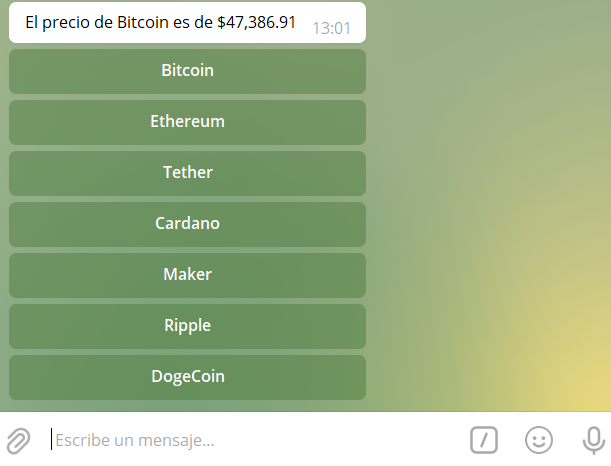